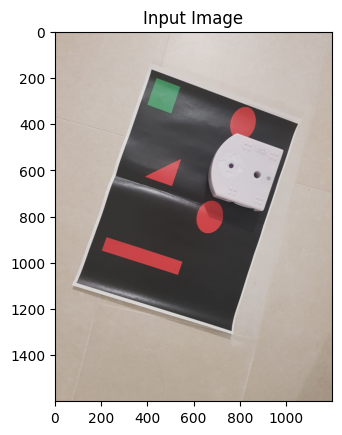

In [1]:
%load_ext autoreload
%autoreload 2
    
import cv2
from vision import *
from plot import *

image = cv2.imread("r2.jpg")

if image is not None:
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('on') 
    plt.title("Input Image")
    plt.show()
else:
    print("Error: Image not loaded")

Hysteresis
- t1 (lower threshold): Any edge with a gradient magnitude below this value will be discarded.
- t2 (upper threshold): Any edge with a gradient magnitude above this value will be considered a strong edge.
- Edges with gradient magnitudes between threshold1 and threshold2 are considered weak edges and are only included if they are connected to strong edges.

In [2]:
show_perspective(image, sigma_init=5, t1_init=50, t2_init=150, epsilon_int=0.1, epsilon_max=0.5)

interactive(children=(IntSlider(value=5, description='Sigma', max=11, min=1, step=2), FloatSlider(value=0.1, d…

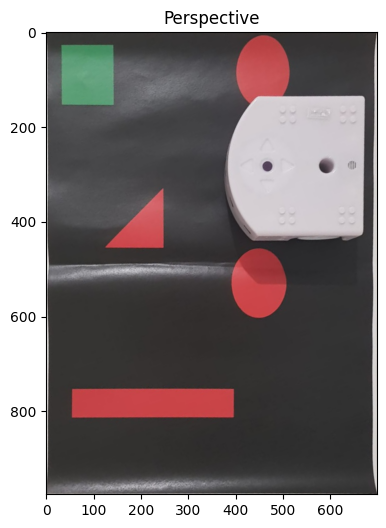

CPU times: total: 312 ms
Wall time: 191 ms


In [3]:
%%time
sigma = 5
t1=50
t2=150
epsilon = 0.1
image = correct_perspective(image, t1=t1, t2=t2, sigma=sigma, epsilon=epsilon)
show_cv2_image(image, fig_size=(6,6), color="BGR", _title="Perspective")

Not enough color? Diminish the low thresholds `T_WL`, `T_RL`, `T_GL`

Noise? Diminish the high thresholds `T_RH`, `T_GH`

In [4]:
show_thresholds(image)

interactive(children=(IntSlider(value=190, description='T_WL', max=255), IntSlider(value=140, description='T_R…

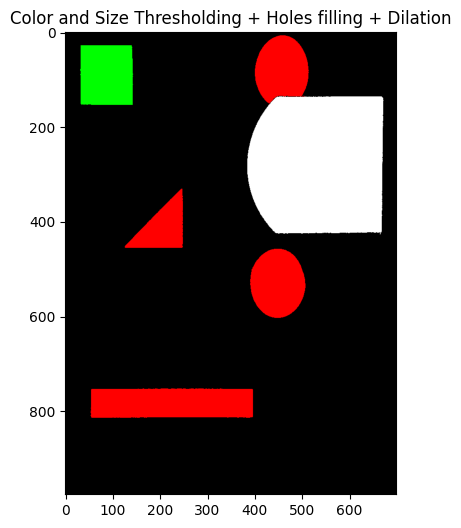

CPU times: total: 641 ms
Wall time: 661 ms


In [5]:
%%time
# white lower bound (190,190,190) < (b,g,r) < (255,255,255)
T_WL=190

# (0,0,T_RL) < (b,g,r) < (T_RH,T_RH,255)
T_RH=140 # blue green upper bound for red
T_RL=120 # red lower bound for red

# (0,T_GL,0) < (b,g,r) < (T_GH,255,T_GH)
T_GH=140 # blue red upper bound for green
T_GL=120 # green lower bound for green

min_size=3000

t_image = threshold_image(image, T_WL, T_RH, T_RL, T_GH, T_GL, min_size,dilatation=False)
show_cv2_image(t_image, fig_size=(6,6), color="BGR", _title="Color and Size Thresholding + Holes filling + Dilation")

In [6]:
image = t_image

Collision start with obstacle
Collision start with obstacle
Collision start with obstacle
Collision start with obstacle


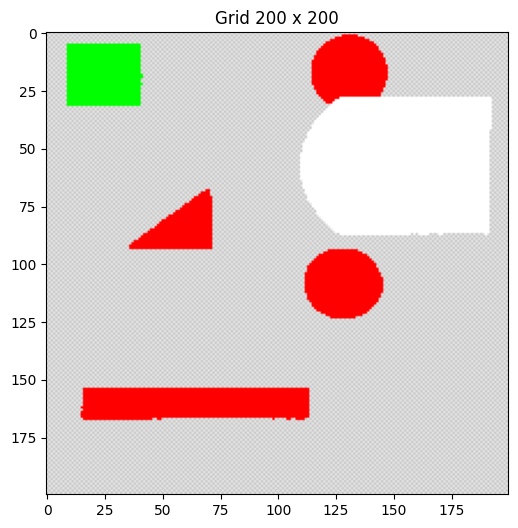

CPU times: total: 2.17 s
Wall time: 2.27 s


In [7]:
%%time
grid_size = 200
grid = get_grid(image, grid_size, verbose=True, full_output=False)

grid_image = grid_to_image(grid)
show_grid(grid)

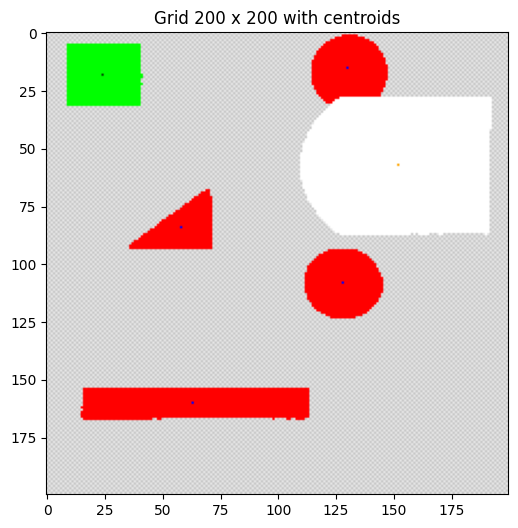

CPU times: total: 328 ms
Wall time: 344 ms


In [8]:
%%time
c_obstacles = get_centroids(grid, "obstacle")
c_robot = get_centroids(grid, "start")
c_goal = get_centroids(grid, "goal")

show_grid(grid, (6,6), c_obstacles, c_robot, c_goal)

In [9]:
show_nose(grid_image, circleSize_init=3)

interactive(children=(IntSlider(value=5, description='Sigma', max=10, min=1), IntSlider(value=50, description=…

In [10]:
%%time
t1_nose=12
t2_nose=35
threshold=26
minLineLength=20
maxLineGap=50
nose = get_nose(grid_image, sigma=sigma, t1=t1_nose, t2=t2_nose, threshold=threshold, minLineLength=minLineLength, maxLineGap=maxLineGap)
nose

CPU times: total: 156 ms
Wall time: 62 ms


array([109,  57])

In [11]:
%%time
_, angle_deg = get_orientation(nose, c_robot.flatten())
print(nose, c_robot.flatten(), angle_deg)

[109  57] [152  57] 180.0
CPU times: total: 0 ns
Wall time: 1 ms
